## Learnings from Time Series, a Kaggle Course
Trend - component of time series representing long-term change in the mean of the series.  
It is slowest moving part of a time series, and largest time scale of importance.  
Can be any persistent, slow moving change in a series, but focusing on mean trends in this course

A moving average plot is a way to discover a trend in a time series.  
Moving average - computed from average of values in some window of time (width), left and right of the current step in the time series.  
Smooths out short-term fluctuations in a time series, hopefully leaving and show only long-term changes.

Time dummy:  target = a * time + b  
Quadratic time dummy:  target = a * time ** 2 + b * time + c  
Linear regression:  learns the a, b (and c if present) coefficients  

Important:  Linear regression can fit curves other than lines.  
            Need to provide curves of right shape as features so it can learn to combine them in a way that best fits the target

In [1]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
simplefilter("ignore")

In [3]:
# setup plot defaults / style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)
%config InlineBackend.figure_format = 'retina'

In [4]:
# load traffic data
tunnel = pd.read_csv("./time_series_demo/tunnel.csv", parse_dates=['Day'])
tunnel = tunnel.set_index('Day').to_period()

Data has daily observations of number of vehicles, will try a window of 365 days for the moving average.  
Hope is to smooth over any short-term changes within the year.  
Create a moving average using rolling method, which defines a window.  
Then chain the mean method to compute the average over the window.

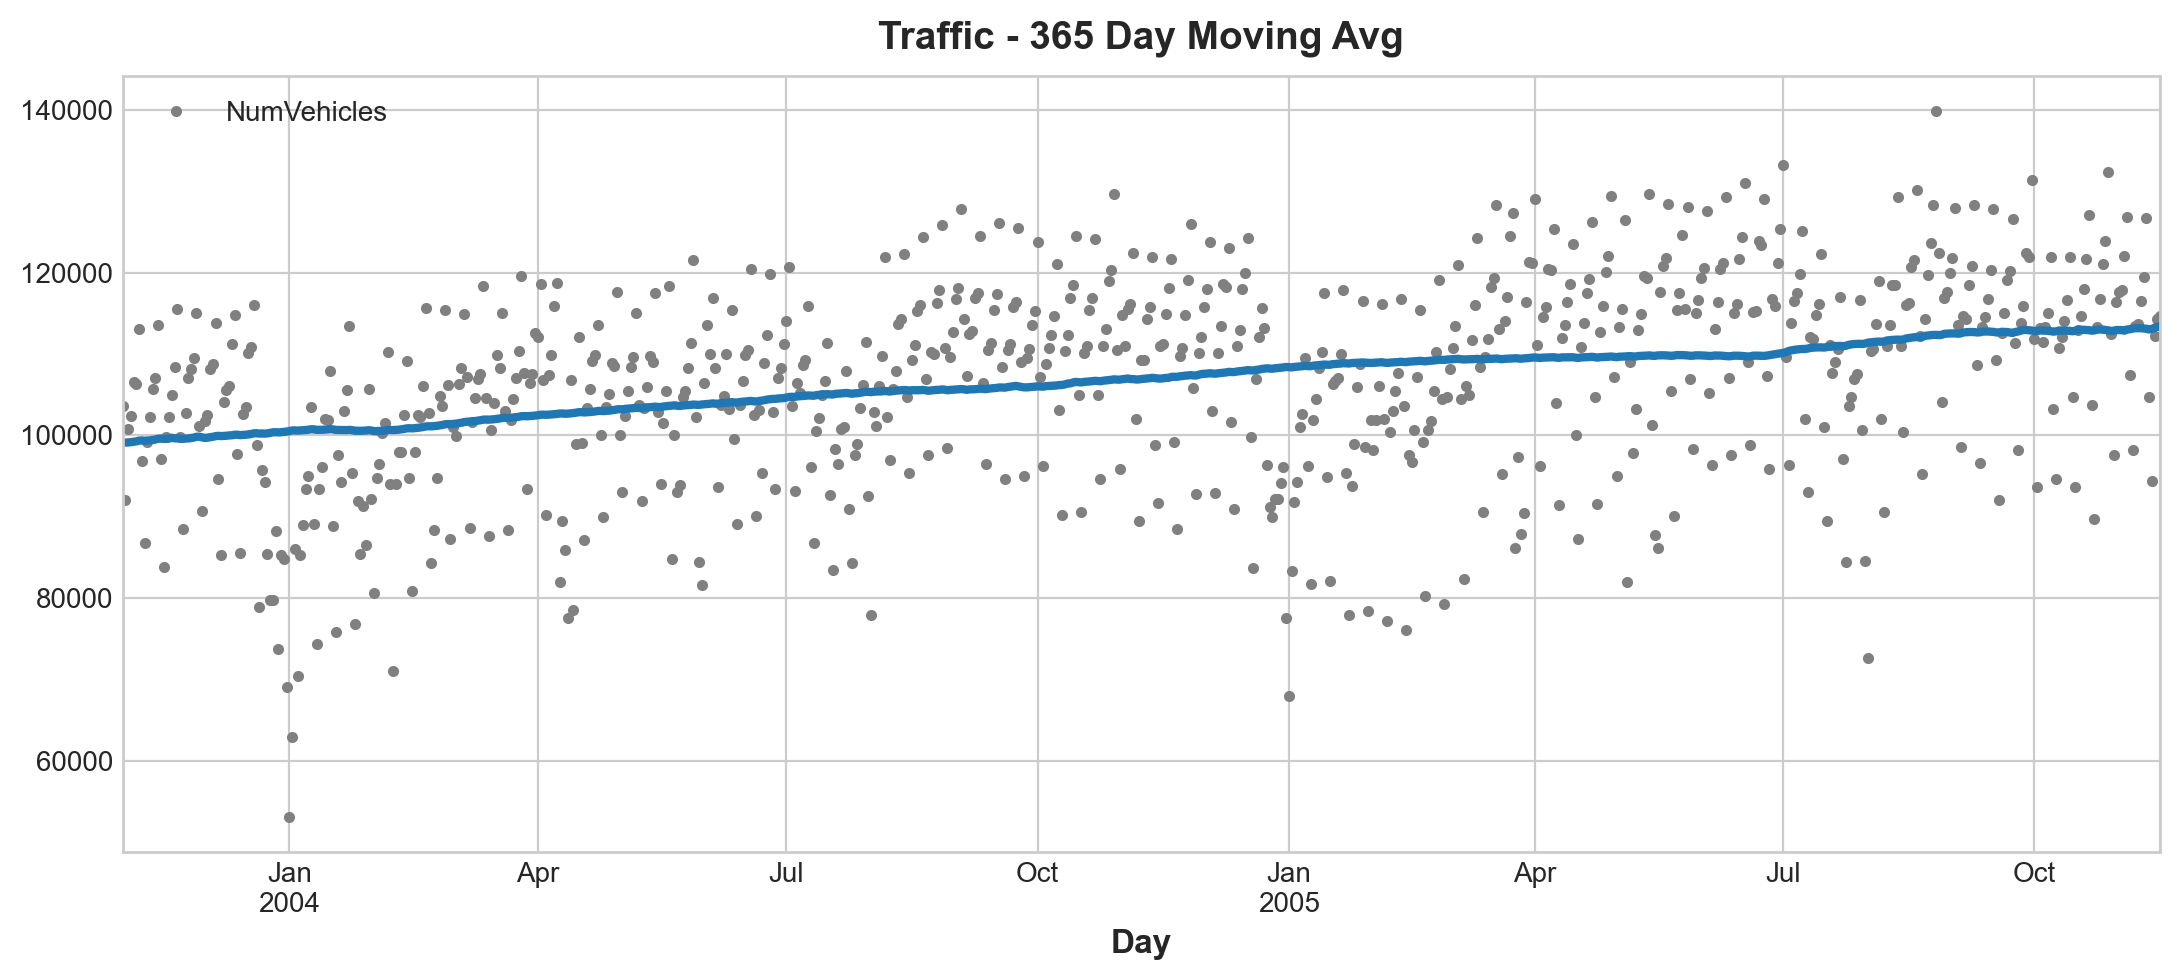

In [6]:
moving_average = tunnel.rolling(
    window=365,      # 365 observation window
    center=True,     # sets average at cetner of window
    min_periods=183, # use about half the window size
).mean()             # comput the mean (could do median, std, min, max, etc.)

ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax,
    linewidth=3,
    title="Traffic - 365 Day Moving Avg",
    legend=False
);

There appears to be a mostly linear trend.  
Install and use statsmodels libray, DeterministicProcess method to get a time dummy instead of engineering with Pandas. 
pip install statsmodels in the kernel.